<a href="https://colab.research.google.com/github/Lukem121/Simple-Stock-Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.950012
2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,317.690002
2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,324.339996


In [70]:
#Number of rows and columns
df.shape

(2033, 6)

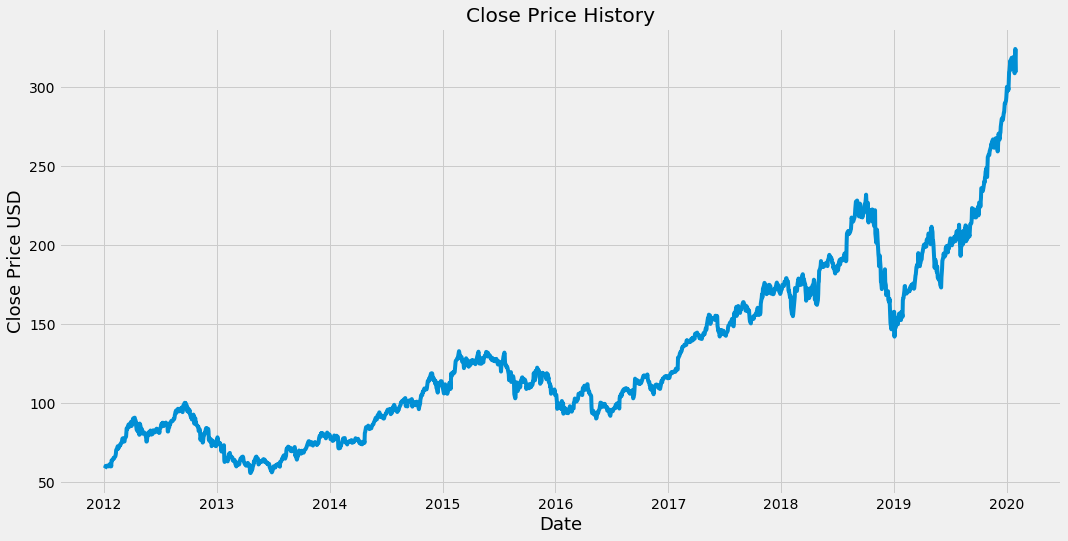

In [71]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()


In [72]:
#New dataframe only close column
data = df.filter(['Close'])

#Covert dataframe to numpy array
dataset = data.values

#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1627

In [0]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [74]:
#Making data set
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01101151, 0.01218714, 0.01462882, 0.01695348, 0.01659707,
       0.01740032, 0.01703327, 0.0164162 , 0.01557571, 0.01817698,
       0.02052292, 0.01979945, 0.01583637, 0.01961858, 0.01589488,
       0.02985876, 0.02877888, 0.03018858, 0.03323669, 0.03508257,
       0.03492831, 0.03435912, 0.03678485, 0.03906693, 0.04165226,
       0.04582813, 0.0546001 , 0.05473309, 0.05961647, 0.06326568,
       0.05699389, 0.05940899, 0.05936112, 0.06613295, 0.06517009,
       0.06695214, 0.07015452, 0.0719366 , 0.07706998, 0.08080965,
       0.0818895 , 0.0822672 , 0.07587309, 0.07433039, 0.07455914,
       0.08057024, 0.08226189, 0.08589514, 0.09445966, 0.10588611,
       0.10374764, 0.10375295, 0.11201426, 0.11459956, 0.11275899,
       0.11107802, 0.10932788, 0.11514215, 0.11913185, 0.1208022 ])]
[0.11667419757475875]



In [0]:
#Convert the x trainand y train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1567, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1567/1567 [==============================] - 122s 78ms/step - loss: 6.9979e-04


In [0]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert data to numpy array
x_test = np.array(x_test)

In [0]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:

#Get the models predicted prices 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [84]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.733776224792062

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


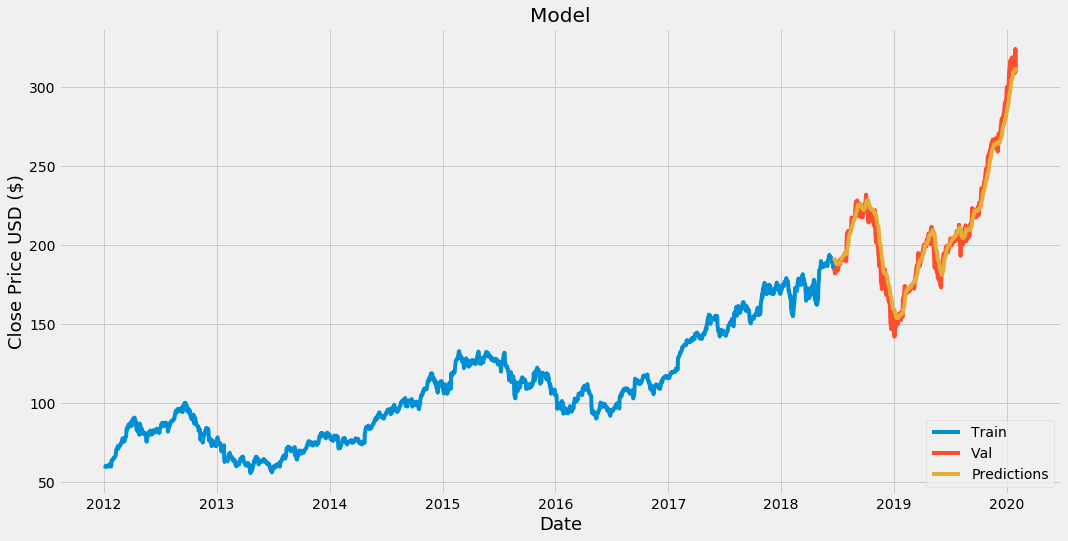

In [85]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [86]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-21,185.460007,192.114441
2018-06-22,184.919998,191.371658
2018-06-25,182.169998,190.638916
2018-06-26,184.429993,189.698730
2018-06-27,184.160004,189.001328
...,...,...
2020-01-27,308.950012,310.916321
2020-01-28,317.690002,310.581329
2020-01-29,324.339996,310.694916


In [87]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[312.75366]]


In [88]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-01-30', end='2020-01-30')
print(apple_quote2['Close'])

Date
2020-01-30    323.869995
Name: Close, dtype: float64
